In [214]:
import json
import pandas as pd
from prepare import *
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

# shhhhhhh
import warnings
warnings.filterwarnings("ignore")

data = json.load(open('data.json'))

In [215]:
type(data)

list

In [216]:
data = json.load(open('data.json'))
df = pd.DataFrame(data)

In [217]:
df.head()

repo    language  \
0               freeCodeCamp/freeCodeCamp  TypeScript   
1                          996icu/996.ICU        None   
2  EbookFoundation/free-programming-books        None   
3     jwasham/coding-interview-university        None   
4                    sindresorhus/awesome        None   

                                     readme_contents  
0  [![freeCodeCamp Social Banner](https://s3.amaz...  
1  [996.ICU](https://996.icu/#/en_US)\n=======\n*...  
2  # List of Free Learning Resources In Many Lang...  
3  # Coding Interview University\n\n> I originall...  
4  <div align="center">\n\t<a href="https://vshym...

In [218]:
(df.language.isnull() == True).sum()

17

In [219]:
df.language = df.language.fillna("resource")

In [220]:
df.language.value_counts()

JavaScript    25
resource      17
TypeScript    12
Python        11
C++            7
Go             7
Shell          4
Java           4
C              3
Rust           2
Vim Script     1
Clojure        1
PHP            1
Markdown       1
Vue            1
C#             1
Dart           1
HTML           1
Name: language, dtype: int64

In [221]:
df.sort_values('language')

repo  language  \
20                              torvalds/linux         C   
66                           Genymobile/scrcpy         C   
92                             netdata/netdata         C   
53                         microsoft/PowerToys        C#   
76                               opencv/opencv       C++   
..                                         ...       ...   
38      justjavac/free-programming-books-zh_CN  resource   
55  practical-tutorials/project-based-learning  resource   
81         mtdvio/every-programmer-should-know  resource   
12                     getify/You-Dont-Know-JS  resource   
28               jlevy/the-art-of-command-line  resource   

                                      readme_contents  
20  Linux kernel\n============\n\nThere are severa...  
66  # scrcpy (v1.24)\n\n<img src="app/data/icon.sv...  
92  <p align="center"><a href="https://netdata.clo...  
53  # Microsoft PowerToys\n\n![Hero image for Micr...  
76  ## OpenCV: Open Source Computer Vision Library...  
..                                                ...  
38  免费的编程中文书籍索引\n============================\n\n[...  
55  # Project Based Learning\n\n[![Gitter](https:/...  
81  > *[Join our community](https://metadevelopmen...  
12  # You Don't Know JS Yet (book series) - 2nd Ed...  
28  🌍\n*[Čeština](README-cs.md) ∙ [Deutsch](README...  

[100 rows x 3 columns]

In [222]:
df.language.unique()

array(['TypeScript', 'resource', 'Python', 'JavaScript', 'C++', 'Shell',
       'Dart', 'C', 'Java', 'Markdown', 'Go', 'Rust', 'C#', 'Vue',
       'Vim Script', 'PHP', 'Clojure', 'HTML'], dtype=object)

In [223]:
for lang in df.language.unique():
    print(lang)

TypeScript
resource
Python
JavaScript
C++
Shell
Dart
C
Java
Markdown
Go
Rust
C#
Vue
Vim Script
PHP
Clojure
HTML


In [224]:
df.language.nunique()

18

In [225]:
df.language.index

RangeIndex(start=0, stop=100, step=1)

In [226]:
for lang in df.language.unique():
    if lang == "TypeScript":
        ts_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "resources":
        resource_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Python":
        py_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "JavaScript":
        js_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "C++":
        cplus2_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Shell":
        shell_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Dart":
        dart_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "C":
        c_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Java":
        java_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Markdown":
        md_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Go":
        go_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Rust":
        rust_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "C#":
        csharp_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Vue":
        vue_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Vim Script":
        vim_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "PHP":
        php_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "Clojure":
        clojure_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    elif lang == "HTML":
        html_words = basic_clean(' '.join(df[df.language == lang].readme_contents))
    else:
        print(f'{lang} is not a language on this table, please check your code.')

resource is not a language on this table, please check your code.


In [227]:
df.language.value_counts()

JavaScript    25
resource      17
TypeScript    12
Python        11
C++            7
Go             7
Shell          4
Java           4
C              3
Rust           2
Vim Script     1
Clojure        1
PHP            1
Markdown       1
Vue            1
C#             1
Dart           1
HTML           1
Name: language, dtype: int64

In [228]:
counts = pd.read_csv('json_data.csv')

In [229]:
counts.length.describe()

count       100.000000
mean      38260.580000
std       69245.691689
min         650.000000
25%        4380.500000
50%       12115.000000
75%       33623.000000
max      387407.000000
Name: length, dtype: float64

In [230]:
# ts_words = lemmatize(ts_words)
# resource_words = lemmatize(' '.join(resource_words))
# py_words = lemmatize(' '.join(py_words))
# js_words = lemmatize(' '.join(js_words))
# cplus2_words = lemmatize(' '.join(cplus2_words))
# shell_words = lemmatize(' '.join(shell_words))
# dart_words = lemmatize(' '.join(dart_words))
# c_words = lemmatize(' '.join(c_words))
# java_words = lemmatize(' '.join(java_words))
# md_words = lemmatize(' '.join(md_words))
# go_words = lemmatize(' '.join(go_words))
# rust_words = lemmatize(' '.join(rust_words))
# csharp_words = lemmatize(' '.join(csharp_words))
# vue_words = lemmatize(' '.join(vue_words))
# vim_words = lemmatize(' '.join(vim_words))
# php_words = lemmatize(' '.join(php_words))
# html_words = lemmatize(' '.join(html_words))

In [231]:
# ts_words = remove_stopwords(ts_words)

In [232]:
# ts_freq = pd.Series(ts_words.split()).value_counts()

In [233]:
# ts_freq

In [234]:
del counts["Unnamed: 0"]
counts.head()

repo    language  \
0               freeCodeCamp/freeCodeCamp  TypeScript   
1                          996icu/996.ICU   resources   
2  EbookFoundation/free-programming-books   resources   
3     jwasham/coding-interview-university   resources   
4                    sindresorhus/awesome   resources   

                                     readme_contents  length  \
0  [![freeCodeCamp Social Banner](https://s3.amaz...   21411   
1  [996.ICU](https://996.icu/#/en_US)\n=======\n*...    7262   
2  # List of Free Learning Resources In Many Lang...   14388   
3  # Coding Interview University\n\n> I originall...  134890   
4  <div align="center">\n\t<a href="https://vshym...   74878   

                                               clean  word_count  \
0  ['freecodecamp', 'social', 'pull', 'request', ...         668   
1  ['please', 'note', 'exists', 'official', 'acco...         444   
2  ['list', 'free', 'learning', 'resource', 'many...         365   
3  ['coding', 'interview', 'university', 'origina...        6509   
4  ['div', 'aligncenter', 'img', 'width500', 'hei...        2855   

                                               words  
0  freecodecamp social pull request open source s...  
1  please note exists official account app mercha...  
2  list free learning resource many language div ...  
3  coding interview university originally created...  
4  div aligncenter img width500 height350 altawes...

In [235]:
# counts.language.unique()

In [236]:
for lang in counts.language.unique():
    if lang == "TypeScript":
        ts_words = counts[counts.language == lang].words
    elif lang == "resources":
        resource_words = counts[counts.language == lang].words
    elif lang == "Python":
        py_words = counts[counts.language == lang].words
    elif lang == "JavaScript":
        js_words = counts[counts.language == lang].words
    elif lang == "C++":
        cplus2_words = counts[counts.language == lang].words
    elif lang == "Shell":
        shell_words = counts[counts.language == lang].words
    elif lang == "Dart":
        dart_words = counts[counts.language == lang].words
    elif lang == "C":
        c_words = counts[counts.language == lang].words
    elif lang == "Java":
        java_words = counts[counts.language == lang].words
    elif lang == "Markdown":
        md_words = counts[counts.language == lang].words
    elif lang == "Go":
        go_words = counts[counts.language == lang].words
    elif lang == "Rust":
        rust_words = counts[counts.language == lang].words
    elif lang == "C#":
        csharp_words = counts[counts.language == lang].words
    elif lang == "Vue":
        vue_words = counts[counts.language == lang].words
    elif lang == "Vim Script":
        vim_words = counts[counts.language == lang].words
    elif lang == "PHP":
        php_words = counts[counts.language == lang].words
    elif lang == "Clojure":
        clojure_words = counts[counts.language == lang].words
    elif lang == "HTML":
        html_words = counts[counts.language == lang].words


In [237]:
html_words

95    freefordev developer open source author massiv...
Name: words, dtype: object

In [238]:
all_words = counts.words

In [239]:
# for readme_contents in counts.readme_contents:
#     if readme_contents == 'packages/next/README.md':
#         actual_readme_contents = requests.get('https://github.com/vercel/next.js/blob/canary/packages/next/README.md')
#         counts['readme_contents'] = actual_readme_contents.text

In [240]:
ts_words = ' '.join(ts_words)
resource_words = ' '.join(resource_words)
py_words = ' '.join(py_words)
js_words = ' '.join(js_words)
cplus2_words = ' '.join(cplus2_words)
shell_words = ' '.join(shell_words)
dart_words = ' '.join(dart_words)
c_words = ' '.join(c_words)
java_words = ' '.join(java_words)
md_words = ' '.join(md_words)
go_words = ' '.join(go_words)
rust_words = ' '.join(rust_words)
csharp_words = ' '.join(csharp_words)
vue_words = ' '.join(vue_words)
vim_words = ' '.join(vim_words)
php_words = ' '.join(php_words)
clojure_words = ' '.join(clojure_words)
html_words = ' '.join(html_words)
all_words = ' '.join(all_words)

In [241]:
all_words_freq = pd.Series(all_words.split()).value_counts()

In [242]:
all_words_freq

yes              1747
go               1463
source           1433
free             1328
vue              1152
                 ... 
juniper             1
jti                 1
mdt                 1
publicip            1
alwaysgrowing       1
Length: 27618, dtype: int64

In [243]:
ts_freq = pd.Series(ts_words.split()).value_counts()
resource_freq = pd.Series(resource_words.split()).value_counts()
py_freq = pd.Series(py_words.split()).value_counts()
js_freq = pd.Series(js_words.split()).value_counts()
cplus2_freq = pd.Series(cplus2_words.split()).value_counts()
shell_freq = pd.Series(shell_words.split()).value_counts()
dart_freq = pd.Series(dart_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
md_freq = pd.Series(md_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
rust_freq = pd.Series(rust_words.split()).value_counts()
csharp_freq = pd.Series(csharp_words.split()).value_counts()
vue_freq = pd.Series(vue_words.split()).value_counts()
vim_freq = pd.Series(vim_words.split()).value_counts()
php_freq = pd.Series(php_words.split()).value_counts()
clojure_freq = pd.Series(clojure_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()



In [244]:
word_counts = pd.concat([ts_freq, resource_freq, py_freq, js_freq, cplus2_freq, shell_freq, dart_freq, c_freq, java_freq, md_freq, go_freq, rust_freq, csharp_freq, vue_freq, vim_freq, php_freq, clojure_freq, html_freq, all_words_freq],axis=1).fillna(0).astype(int)
word_counts.columns = "typescript", "resource", "python", "javascript", "c++", "shell", "dart", "c", "java", "markdown", "go", "rust", "c#", "vue", "vim", "php", "clojure", "html", "all"

In [245]:
word_counts.head()

typescript  resource  python  javascript  c++  shell  dart  c  \
redux              69        10       0           1    0      0     0  0   
code               48       150     111         151   35      6     7  1   
p                  41       293      74          56    0      4     2  6   
project            38       157      29          89   18      6     1  3   
storybook          36         4       0           0    0      0     0  0   

           java  markdown   go  rust  c#  vue  vim  php  clojure  html  all  
redux         0         0    0     0   0    0    0    0        0     0   80  
code         10         0  123     2   5    1    3    2       25   112  792  
p             7         6    8     0   0    7    0    3        0     1  508  
project       6         0   62     3   2    0    2    1        2   149  568  
storybook     0         0    0     0   0    0    0    0        0     0   40

In [246]:
word_counts.shape

(27618, 19)

In [247]:
word_counts.to_csv("word_counts.csv")

In [248]:
word_counts.sort_values('all', ascending=False)

typescript  resource  python  javascript  c++  shell  dart  c  \
yes                      1         3    1738           2    0      1     0  2   
go                       6        60      15         136    2      1     0  1   
source                  13       119      53        1014    9     22     2  4   
free                     6       104      55          79    1      0     1  3   
vue                      7      1137       0           2    0      0     0  0   
...                    ...       ...     ...         ...  ...    ...   ... ..   
flask__name__            0         0       1           0    0      0     0  0   
approute                 0         0       1           0    0      0     0  0   
http1270015000           0         0       1           0    0      0     0  0   
guidelines_              0         0       1           0    0      0     0  0   
mojoauth                 0         0       0           0    0      0     0  0   

                java  markdown    go  rust  c#  vue  vim  php  clojure  html  \
yes                0         0     0     0   0    0    0    0        0     0   
go                 7         0  1221     2   0    0    2    0        0    10   
source            11         0    54     8   1    0    2    0        0   121   
free               2         0     9     0   0    0    0    0        3  1065   
vue                0         0     0     0   0    4    0    0        0     2   
...              ...       ...   ...   ...  ..  ...  ...  ...      ...   ...   
flask__name__      0         0     0     0   0    0    0    0        0     0   
approute           0         0     0     0   0    0    0    0        0     0   
http1270015000     0         0     0     0   0    0    0    0        0     0   
guidelines_        0         0     0     0   0    0    0    0        0     0   
mojoauth           0         0     0     0   0    0    0    0        0     1   

                 all  
yes             1747  
go              1463  
source          1433  
free            1328  
vue             1152  
...              ...  
flask__name__      1  
approute           1  
http1270015000     1  
guidelines_        1  
mojoauth           1  

[27618 rows x 19 columns]

In [249]:
word_counts.sort_values(["typescript", "resource", "python", "javascript", "c++", "shell", "dart", "c", "java", "markdown", "go", "rust", "c#", "vue", "vim", "php", "clojure", "html", "all"], ascending=False)

typescript  resource  python  javascript  c++  shell  dart  c  \
redux                  69        10       0           1    0      0     0  0   
code                   48       150     111         151   35      6     7  1   
p                      41       293      74          56    0      4     2  6   
project                38       157      29          89   18      6     1  3   
storybook              36         4       0           0    0      0     0  0   
...                   ...       ...     ...         ...  ...    ...   ... ..   
25kmo                   0         0       0           0    0      0     0  0   
oryhttpsorysh           0         0       0           0    0      0     0  0   
idp                     0         0       0           0    0      0     0  0   
idaas                   0         0       0           0    0      0     0  0   
mojoauth                0         0       0           0    0      0     0  0   

               java  markdown   go  rust  c#  vue  vim  php  clojure  html  \
redux             0         0    0     0   0    0    0    0        0     0   
code             10         0  123     2   5    1    3    2       25   112   
p                 7         6    8     0   0    7    0    3        0     1   
project           6         0   62     3   2    0    2    1        2   149   
storybook         0         0    0     0   0    0    0    0        0     0   
...             ...       ...  ...   ...  ..  ...  ...  ...      ...   ...   
25kmo             0         0    0     0   0    0    0    0        0     1   
oryhttpsorysh     0         0    0     0   0    0    0    0        0     1   
idp               0         0    0     0   0    0    0    0        0     1   
idaas             0         0    0     0   0    0    0    0        0     1   
mojoauth          0         0    0     0   0    0    0    0        0     1   

               all  
redux           80  
code           792  
p              508  
project        568  
storybook       40  
...            ...  
25kmo            1  
oryhttpsorysh    1  
idp              1  
idaas            1  
mojoauth         1  

[27618 rows x 19 columns]

In [250]:
for col in word_counts.columns:
        print(f"{col} : total = {word_counts[col].sum()} | percent of documents = {round(word_counts[col].sum() / word_counts['all'].sum(), 3)}")

typescript : total = 4583 | percent of documents = 0.022
resource : total = 57502 | percent of documents = 0.275
python : total = 32979 | percent of documents = 0.158
javascript : total = 49022 | percent of documents = 0.235
c++ : total = 3896 | percent of documents = 0.019
shell : total = 4907 | percent of documents = 0.023
dart : total = 383 | percent of documents = 0.002
c : total = 3196 | percent of documents = 0.015
java : total = 4442 | percent of documents = 0.021
markdown : total = 91 | percent of documents = 0.0
go : total = 26409 | percent of documents = 0.126
rust : total = 928 | percent of documents = 0.004
c# : total = 899 | percent of documents = 0.004
vue : total = 619 | percent of documents = 0.003
vim : total = 301 | percent of documents = 0.001
php : total = 197 | percent of documents = 0.001
clojure : total = 659 | percent of documents = 0.003
html : total = 17922 | percent of documents = 0.086
all : total = 208935 | percent of documents = 1.0


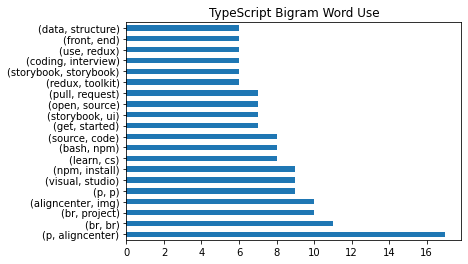

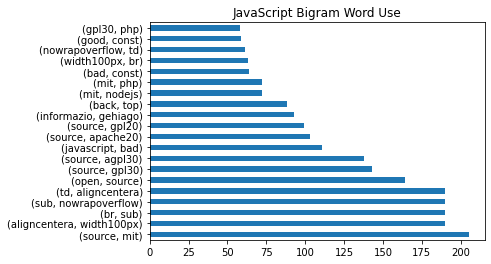

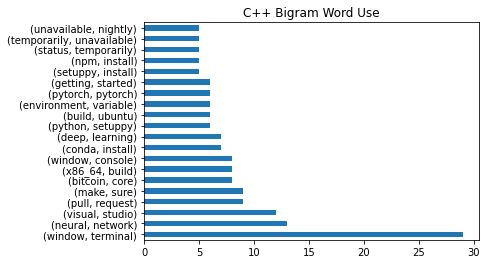

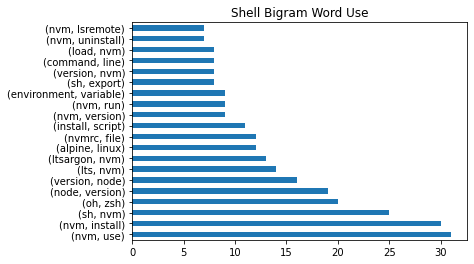

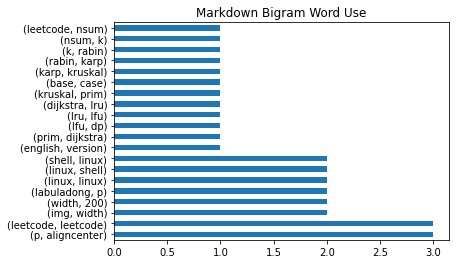

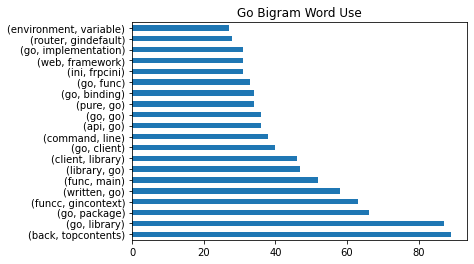

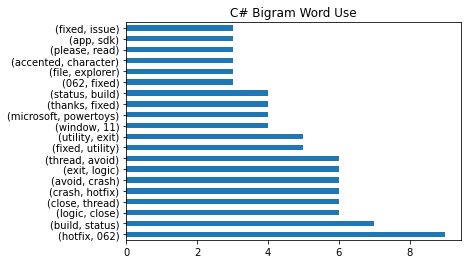

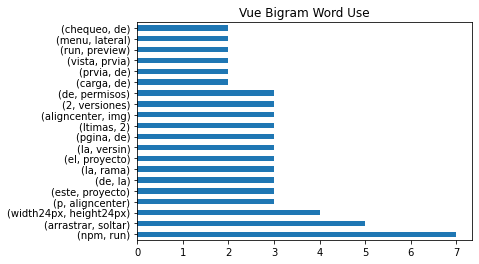

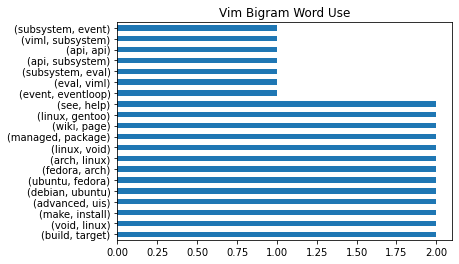

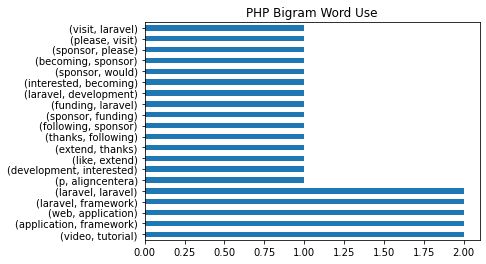

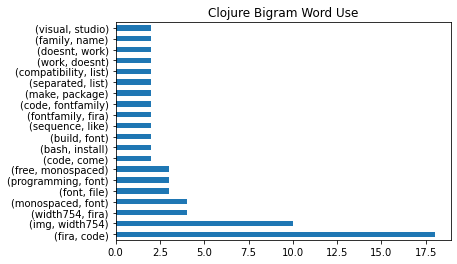

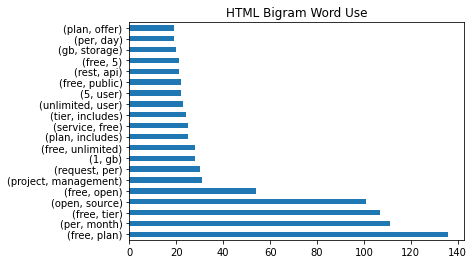

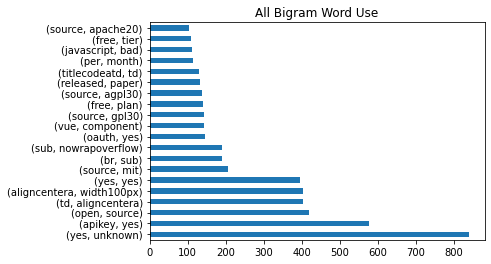

In [251]:
pd.Series(nltk.bigrams(ts_words.split())).value_counts().head(20).plot.barh()
plt.title("TypeScript Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(resource_words.split())).value_counts().head(20).plot.barh()
plt.title("Resource Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(py_words.split())).value_counts().head(20).plot.barh()
plt.title("Python Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(js_words.split())).value_counts().head(20).plot.barh()
plt.title("JavaScript Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(cplus2_words.split())).value_counts().head(20).plot.barh()
plt.title("C++ Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(shell_words.split())).value_counts().head(20).plot.barh()
plt.title("Shell Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(dart_words.split())).value_counts().head(20).plot.barh()
plt.title("Dart Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(20).plot.barh()
plt.title("C Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20).plot.barh()
plt.title("Java Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(md_words.split())).value_counts().head(20).plot.barh()
plt.title("Markdown Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(go_words.split())).value_counts().head(20).plot.barh()
plt.title("Go Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(rust_words.split())).value_counts().head(20).plot.barh()
plt.title("Rust Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(csharp_words.split())).value_counts().head(20).plot.barh()
plt.title("C# Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(vue_words.split())).value_counts().head(20).plot.barh()
plt.title("Vue Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(vim_words.split())).value_counts().head(20).plot.barh()
plt.title("Vim Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(php_words.split())).value_counts().head(20).plot.barh()
plt.title("PHP Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(clojure_words.split())).value_counts().head(20).plot.barh()
plt.title("Clojure Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(html_words.split())).value_counts().head(20).plot.barh()
plt.title("HTML Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(20).plot.barh()
plt.title("All Bigram Word Use")
plt.show()


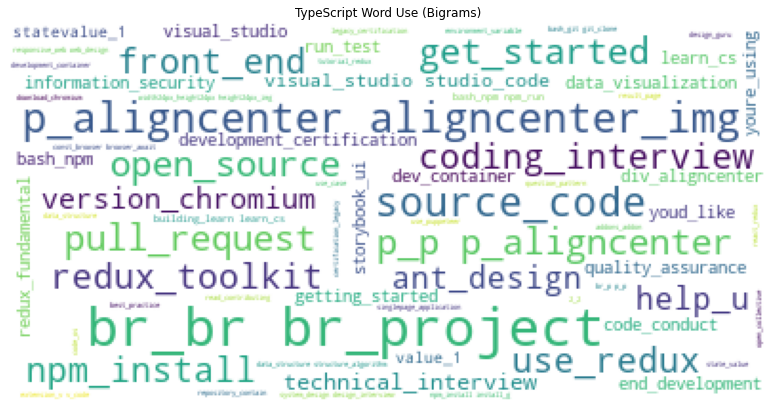

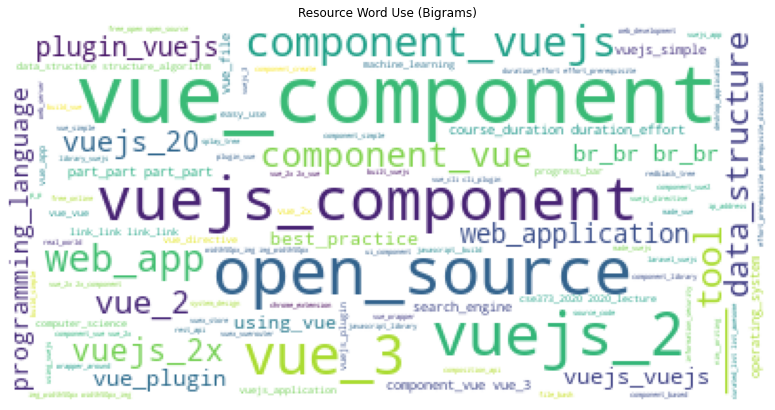

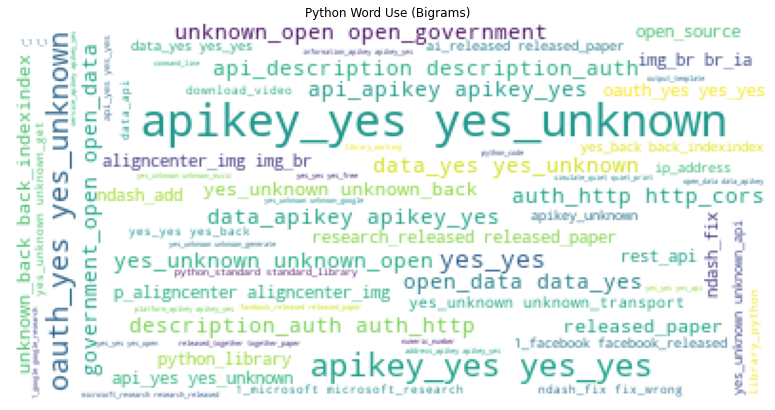

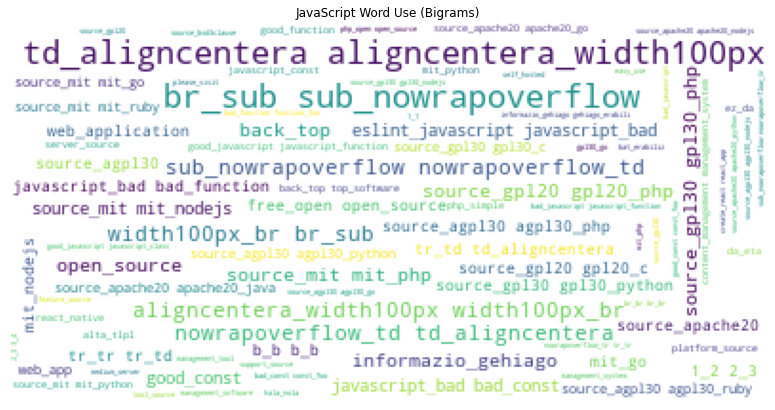

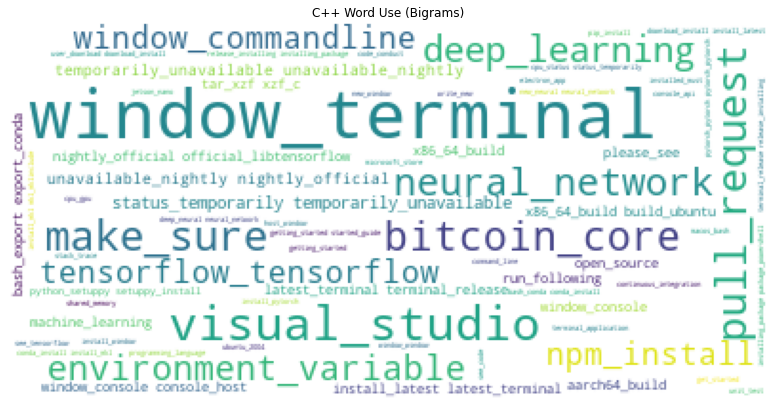

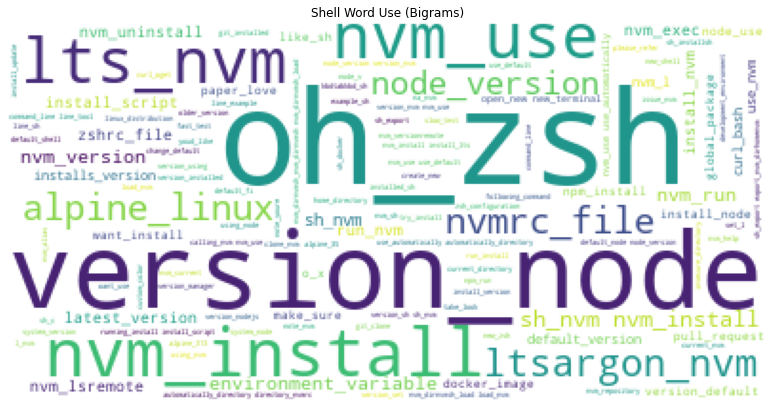

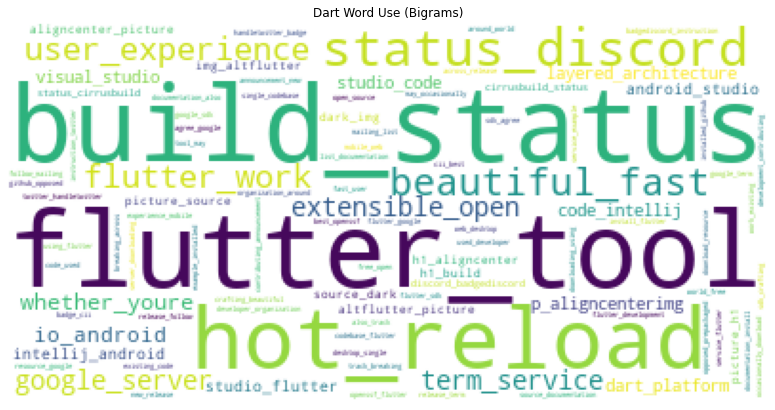

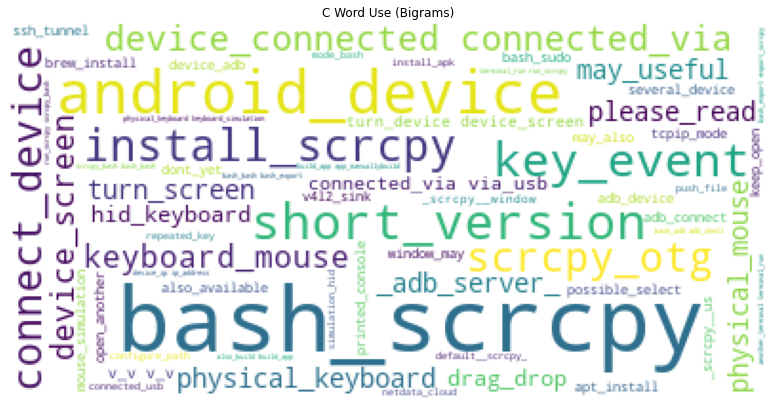

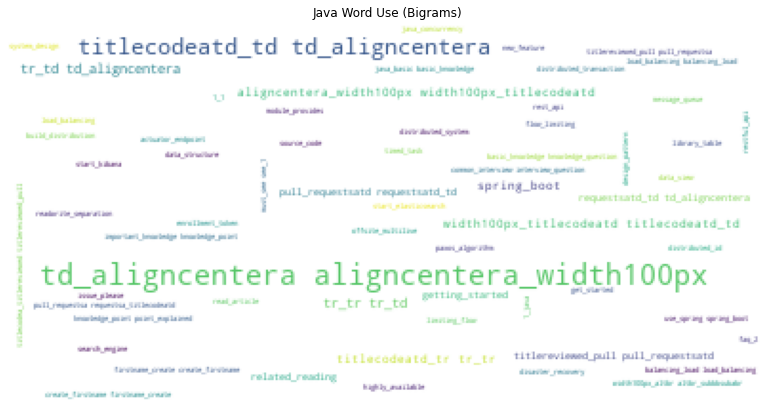

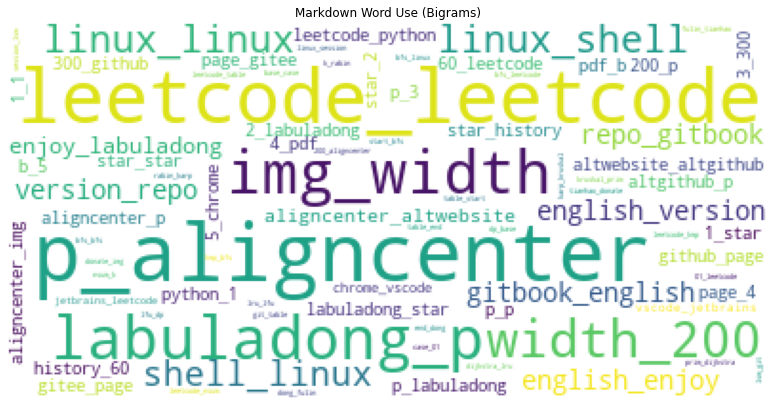

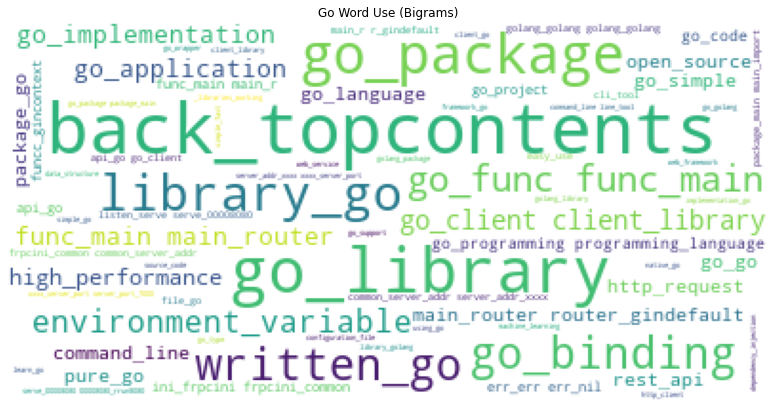

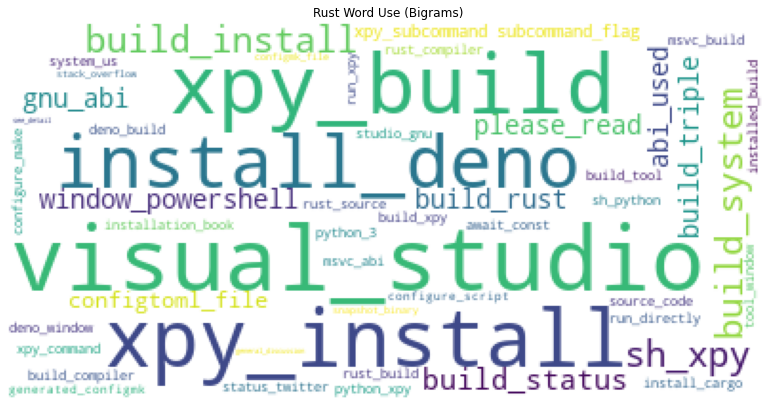

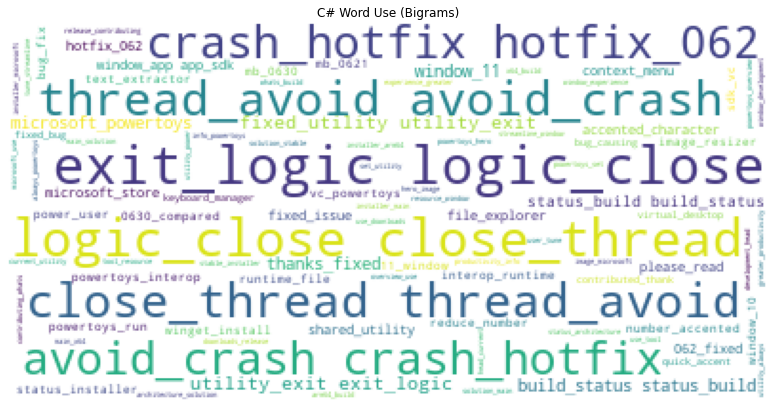

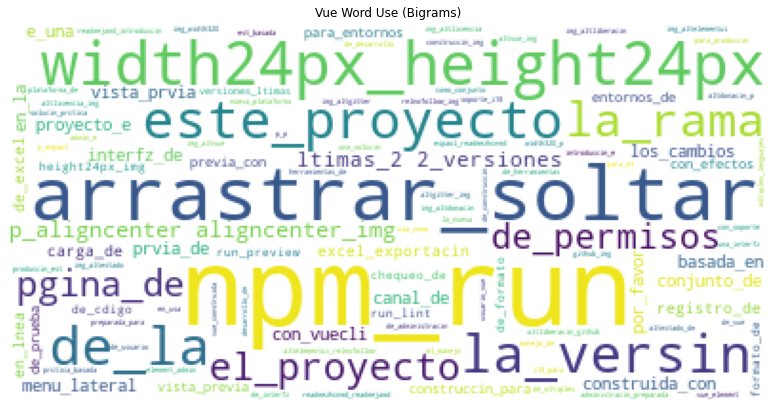

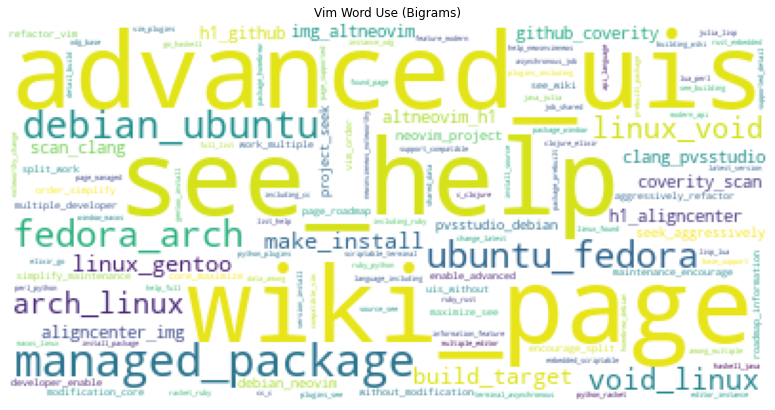

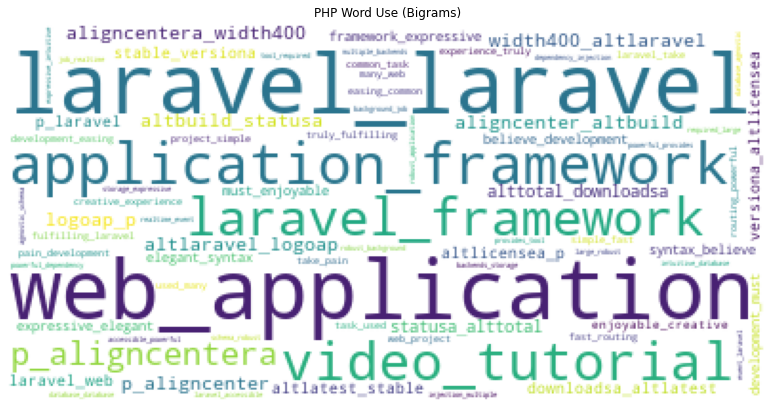

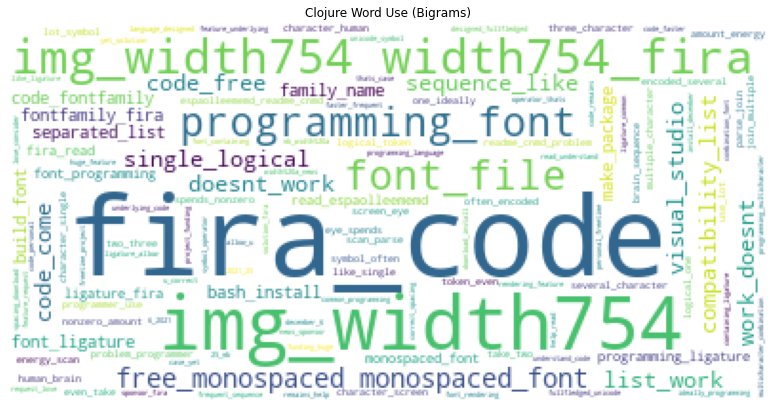

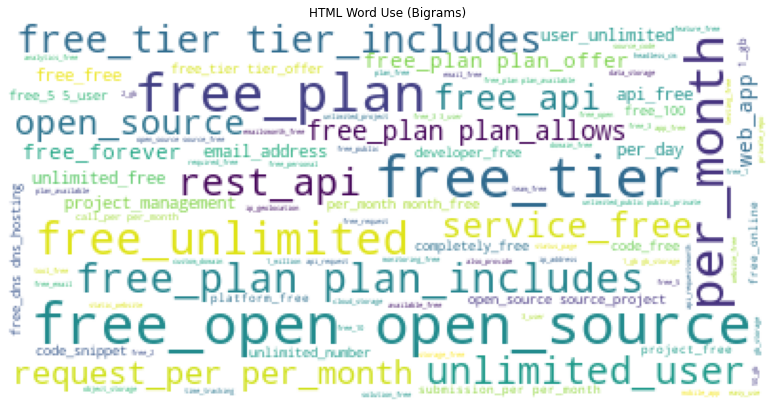

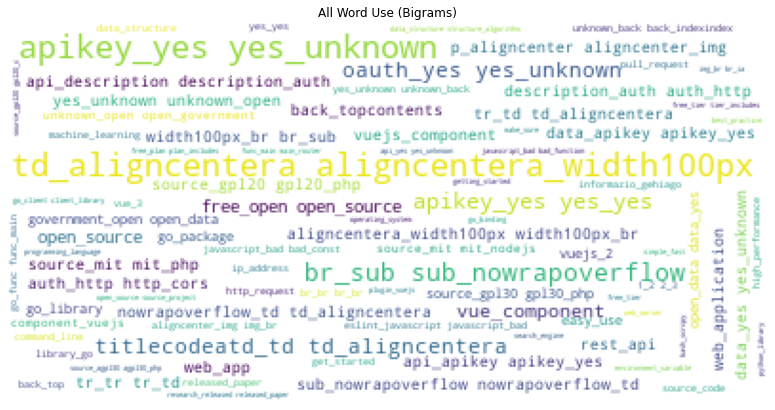

In [252]:
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(ts_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("TypeScript Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(resource_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Resource Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(py_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Python Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(js_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("JavaScript Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(cplus2_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("C++ Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(shell_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Shell Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(dart_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Dart Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(c_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("C Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(java_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Java Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(md_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Markdown Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(go_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Go Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(rust_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Rust Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(csharp_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("C# Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(vue_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Vue Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(vim_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Vim Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(php_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("PHP Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(clojure_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Clojure Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(html_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("HTML Word Use (Bigrams)")
plt.show()
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(all_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("All Word Use (Bigrams)")
plt.show()


In [253]:
# bigram modeling
ts_bigram = pd.Series(nltk.bigrams(ts_words.split()))
resource_bigram = pd.Series(nltk.bigrams(resource_words.split()))
py_bigram = pd.Series(nltk.bigrams(py_words.split()))
js_bigram = pd.Series(nltk.bigrams(js_words.split()))
cplus2_bigram = pd.Series(nltk.bigrams(cplus2_words.split()))
shell_bigram = pd.Series(nltk.bigrams(shell_words.split()))
dart_bigram = pd.Series(nltk.bigrams(dart_words.split()))
c_bigram = pd.Series(nltk.bigrams(c_words.split()))
java_bigram = pd.Series(nltk.bigrams(java_words.split()))
md_bigram = pd.Series(nltk.bigrams(md_words.split()))
go_bigram = pd.Series(nltk.bigrams(go_words.split()))
rust_bigram = pd.Series(nltk.bigrams(rust_words.split()))
csharp_bigram = pd.Series(nltk.bigrams(csharp_words.split()))
vue_bigram = pd.Series(nltk.bigrams(vue_words.split()))
vim_bigram = _bigram = pd.Series(nltk.bigrams(vim_words.split()))
php_bigram = pd.Series(nltk.bigrams(php_words.split()))
clojure_bigram = pd.Series(nltk.bigrams(clojure_words.split()))
html_bigram = pd.Series(nltk.bigrams(html_words.split()))
all_bigram = pd.Series(nltk.bigrams(all_words.split()))


In [254]:
py_bigram.apply(list)

0             [div, aligncenter]
1        [aligncenter, h1public]
2             [h1public, apish1]
3                   [apish1, ia]
4               [ia, collective]
                  ...           
32973              [code, issue]
32974           [issue, tracker]
32975         [tracker, website]
32976         [website, twitter]
32977            [twitter, chat]
Length: 32978, dtype: object

In [255]:
## Saved for Tri-Gram if needed:
# pd.Series(nltk.bigrams(ts_words.split())).value_counts().head(20).plot.barh()
# plt.title("TypeScript Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(resource_words.split())).value_counts().head(20).plot.barh()
# plt.title("Resource Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(py_words.split())).value_counts().head(20).plot.barh()
# plt.title("Python Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(js_words.split())).value_counts().head(20).plot.barh()
# plt.title("JavaScript Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(cplus2_words.split())).value_counts().head(20).plot.barh()
# plt.title("C++ Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(shell_words.split())).value_counts().head(20).plot.barh()
# plt.title("Shell Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(dart_words.split())).value_counts().head(20).plot.barh()
# plt.title("Dart Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(c_words.split())).value_counts().head(20).plot.barh()
# plt.title("C Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20).plot.barh()
# plt.title("Java Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(md_words.split())).value_counts().head(20).plot.barh()
# plt.title("Markdown Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(go_words.split())).value_counts().head(20).plot.barh()
# plt.title("Go Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(rust_words.split())).value_counts().head(20).plot.barh()
# plt.title("Rust Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(csharp_words.split())).value_counts().head(20).plot.barh()
# plt.title("C# Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(vue_words.split())).value_counts().head(20).plot.barh()
# plt.title("Vue Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(vim_words.split())).value_counts().head(20).plot.barh()
# plt.title("Vim Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(php_words.split())).value_counts().head(20).plot.barh()
# plt.title("PHP Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(clojure_words.split())).value_counts().head(20).plot.barh()
# plt.title("Clojure Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(html_words.split())).value_counts().head(20).plot.barh()
# plt.title("HTML Bigram Word Use")
# plt.show()
# pd.Series(nltk.bigrams(all_words.split())).value_counts().head(20).plot.barh()
# plt.title("All Bigram Word Use")
# plt.show()


In [256]:
# ts_words
# resource_words
# py_words
# js_words
# cplus2_words
# shell_words
# dart_words
# c_words
# java_words
# md_words
# go_words
# rust_words
# csharp_words
# vue_words
# vim_words
# php_words
# clojure_words
# html_words
# all_words

In [257]:
##### FOR LATER REFERENCE?!

# word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
# sparse_matrix = word_vectorizer.fit_transform(counts.words)
# frequencies = sum(sparse_matrix).toarray()[0]
# pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [258]:
for lang in counts.language.unique():
    if lang == "TypeScript":
        ts_bigram_df = pd.DataFrame(ts_bigram)
        ts_bigram_df.columns = ["bigram"]
        ts_bigram_df['language'] = lang
    elif lang == "resources":
        resource_bigram_df = pd.DataFrame(resource_bigram)
        resource_bigram_df.columns = ["bigram"]
        resource_bigram_df['language'] = lang
    elif lang == "Python":
        py_bigram_df = pd.DataFrame(py_bigram)
        py_bigram_df.columns = ["bigram"]
        py_bigram_df['language'] = lang    
    elif lang == "JavaScript":
        js_bigram_df = pd.DataFrame(js_bigram)
        js_bigram_df.columns = ["bigram"]
        js_bigram_df['language'] = lang
    elif lang == "C++":
        cplus2_bigram_df = pd.DataFrame(cplus2_bigram)
        cplus2_bigram_df.columns = ["bigram"]
        cplus2_bigram_df['language'] = lang
    elif lang == "Shell":
        shell_bigram_df = pd.DataFrame(shell_bigram)
        shell_bigram_df.columns = ["bigram"]
        shell_bigram_df['language'] = lang
    elif lang == "Dart":
        dart_bigram_df = pd.DataFrame(dart_bigram)
        dart_bigram_df.columns = ["bigram"]
        dart_bigram_df['language'] = lang
    elif lang == "C":
        c_bigram_df = pd.DataFrame(c_bigram)
        c_bigram_df.columns = ["bigram"]
        c_bigram_df['language'] = lang
    elif lang == "Java":
        java_bigram_df = pd.DataFrame(java_bigram)
        java_bigram_df.columns = ["bigram"]
        java_bigram_df['language'] = lang
    elif lang == "Markdown":
        md_bigram_df = pd.DataFrame(md_bigram)
        md_bigram_df.columns = ["bigram"]
        md_bigram_df['language'] = lang
    elif lang == "Go":
        go_bigram_df = pd.DataFrame(go_bigram)
        go_bigram_df.columns = ["bigram"]
        go_bigram_df['language'] = lang
    elif lang == "Rust":
        rust_bigram_df = pd.DataFrame(rust_bigram)
        rust_bigram_df.columns = ["bigram"]
        rust_bigram_df['language'] = lang
    elif lang == "C#":
        csharp_bigram_df = pd.DataFrame(csharp_bigram)
        csharp_bigram_df.columns = ["bigram"]
        csharp_bigram_df['language'] = lang
    elif lang == "Vue":
        vue_bigram_df = pd.DataFrame(vue_bigram)
        vue_bigram_df.columns = ["bigram"]
        vue_bigram_df['language'] = lang
    elif lang == "Vim Script":
        vim_bigram_df = pd.DataFrame(vim_bigram)
        vim_bigram_df.columns = ["bigram"]
        vim_bigram_df['language'] = lang
    elif lang == "PHP":
        php_bigram_df = pd.DataFrame(php_bigram)
        php_bigram_df.columns = ["bigram"]
        php_bigram_df['language'] = lang
    elif lang == "Clojure":
        clojure_bigram_df = pd.DataFrame(clojure_bigram)
        clojure_bigram_df.columns = ["bigram"]
        clojure_bigram_df['language'] = lang
    elif lang == "HTML":
        html_bigram_df = pd.DataFrame(html_bigram)
        html_bigram_df.columns = ["bigram"]
        html_bigram_df['language'] = lang


In [259]:
html_bigram_df.head()

bigram language
0  (freefordev, developer)     HTML
1        (developer, open)     HTML
2           (open, source)     HTML
3         (source, author)     HTML
4        (author, massive)     HTML

In [260]:
bigram_df = pd.concat([ts_bigram_df, resource_bigram_df, py_bigram_df, js_bigram_df, cplus2_bigram_df, shell_bigram_df, dart_bigram_df, c_bigram_df, java_bigram_df, md_bigram_df, go_bigram_df, rust_bigram_df, csharp_bigram_df, vue_bigram_df, vim_bigram_df, php_bigram_df, clojure_bigram_df, html_bigram_df],axis=0)

In [261]:
bigram_df.language.value_counts()

resources     57501
JavaScript    49021
Python        32978
Go            26408
HTML          17921
Shell          4906
TypeScript     4582
Java           4441
C++            3895
C              3195
Rust            927
C#              898
Clojure         658
Vue             618
Dart            382
Vim Script      300
PHP             196
Markdown         90
Name: language, dtype: int64

In [262]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208917 entries, 0 to 17920
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   bigram    208917 non-null  object
 1   language  208917 non-null  object
dtypes: object(2)
memory usage: 4.8+ MB


In [263]:
X = bigram_df.bigram
y = bigram_df.language
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state= 536)

In [264]:
X_train.head()

13390     (language, high)
13897      (r, aggregator)
51753       (kit, library)
200          (called, xpy)
9194     (sheet, airtable)
Name: bigram, dtype: object

In [265]:
y_train.head()

13390            Go
13897    JavaScript
51753     resources
200            Rust
9194           HTML
Name: language, dtype: object

In [266]:
### COULD I HAVE USED THIS TO SEPERATE THEM?!?! LIKE IN MY REF ABOVE?!?

# tree = DecisionTreeClassifier(max_depth=3)
# tree.fit(X_train_test, y_train)
# tree.score(X_train_test, y_train)

In [267]:
# word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
# sparse_matrix = word_vectorizer.fit_transform(counts.words)
# frequencies = sum(sparse_matrix).toarray()[0]
# pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [268]:
X = counts.words
y = counts.language
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state= 536)

In [269]:
X_train.head()

66    scrcpy v124 img width128 height128 altscrcpy a...
63    rust programming language main source code rep...
94    flask flask lightweight wsgi_ web application ...
96    atom build atom repository atom archived decem...
57    line need empty line c kramdown isnt smart dea...
Name: words, dtype: object

In [270]:
cv = CountVectorizer(ngram_range=(1,3), analyzer='word')
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.625

In [271]:
# X_test_bow = cv.transform(X_test)
# tree.score(X_test_bow, y_test)